#Redes Neuronales Convolucionales

##Clasificación de Imágenes con Caffe y Digits.

Caffe: https://github.com/BVLC/caffe

Digits: https://github.com/NVIDIA/DIGITS

---

##Arquitectura de una Red Neuronal Convolucional

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/mylenet.png">

Las Redes Neuronales Convolucionales son inspiradas en la corteza visual. De esta corteza conocemos que tienen un arreglo complejo de células. Estas células son sensibles a pequeñas regiones en el campo de visión. Estas sub-regiones cubren por completo el campo visual. Las célilas actuan como filtros locales y están diseñadas para explotar la relación espacial presente en las imágenes naturales.


* Entrenamiento supervisado.


* Típicamente, tienen los siguientes elementos.

  * Convolutional Layer
  * Non-linearity Layer
  * Pooling Layer
  * Fully Connected Layer
  
---

##Convolutional Layer

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/convolution.gif" width=400px align=center>

La capa convolucional consiste en un grupo de filtros.
Estos filtros son pequeños campos receptivos que desplazamos por todo el ancho y largo de la imagen de entrada, produciendo un mapa de características. 



###a. Conectividad Local

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/local_connected.png" width=70%>

La idea consiste en conectar cada neurona en la capa de convolución con una región pequeña en la imagen de entrada, pero conectada a todos los canales de color. <br>Esta región la llamaremos el **campo receptivo (F)**.


###b. Disposición Espacial

Consiste de 3 hiperparámetros que controlan la salida que obtenemos de la red convolucional.

1. **Depth (Profundidad):** Controla el número de neuronas en la capa convolucional que se conectan a la misma región en la imagen de entrada. Nos referimos a un grupo de neuronas que están conectadas a la misma región como una **columna de profundidad**.

2. **Stride:** Este parámetro especifica el "paso" que dará nuestro campo receptivo para ubicar una nueva columna de profundidad.

3. **Zero-padding:** En ocasiones será conveniente definir los bordes de la entrada a la red en ceros, ya que esto nos permitirá controlar el tamaño de la salida en la red neuronal.

La salida de la capa convolucional se calcula de la siguiente manera:

\begin{equation}
  W_{output} = [(W_{input}- F + 2P)/S + 1] 
\end{equation}

\begin{equation}
  H_{output} = [(H_{input} - F + 2P)/S + 1 ]  
\end{equation}

Por lo tanto, si tenemos la siguiente situación:

\begin{equation}
  Input = 227_{width} * 227_{height} * 3_{rgb}
\end{equation}

...y definimos los hiperparámetros:

\begin{align}
  Field = 11\\
  Depth = 96\\
  Stride = 4\\
  Zero-padding = 0
\end{align}

La salida de esta capa tendrá las siguientes dimensiones:

\begin{equation}
  Output = 55_{width} * 55_{height} * 96_{neurons}
\end{equation}

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/conv_out_1.png">


###c.Pesos y bias compartidos

Hasta el momento cada neurona en nuestra red convolucional tiene $1$ bias y $11$x$11$ pesos conectados al campo perceptivo. 

Puesto que las imágenes naturales tienen propiedades **estacionarias**, es decir que las características aprendidas en una parte de la imagen serán útiles en cualquier otra parte.

Gracias a esto podemos usar el mismo bias y $11$x$11$ pesos en todas las neuronas de la primera capa para que busquen, por ejemplo, una linea vertical en toda la imagen. Y usaremos pesos diferentes en las demas capas de neuronas para buscar diferentes características.

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/conv_out_2.png" >

Despues del entrenamiento estos $96$ pesos de $11$x$11$ aprenderán a reconocer características simples de la imagen.

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/features_conv1.jpg" width=250>

---


##Non-linearity Layer

Podemos definir la salida de una capa en la red neuronal como $\bar o$ que sería el resultado
de una función de activación $f()$ aplicada al producto entre la entrada

$\bar x=\begin{bmatrix}x_1\\x_2\\.\\.\\x_3\\x_4\end{bmatrix}$ y los pesos de la capa 
$W=\begin{bmatrix}w_{00} & w_{01} & . & . & w_{0n} & b_0\\
                  w_{10} & w_{11} & . & . & w_{1n} & b_1\\
                  . & . & . & . & . & .\\
                  w_{n0} & w_{n1} & . & . & w_{nn} & b_n\\\end{bmatrix}$ produciendo $\bar o = f(W\bar x)$
                  
Lo que podemos observar en este caso es que si usamos activación **lineal**, entonces una red neuronal con 2 capas se describiría de la siguiente forma:

$\bar o_1 = W_1\bar x$

$\bar o_2 = W_2\bar o_1 = W_2W_1\bar x$

Esto significa que añadir mas capas hara el sistemas mas lento y complicado, pero no mas expresivo. Esto no se cumple cuando usamos una función de activación **no lineal**.

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/relu.png" style="float: left">
<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/relu.png" style="float: left" width=300>
<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/tanh2.png" style="float: left" width=300>



---

##Pooling Layer

La función de esta capa es reducir el tamaño de la representación entregada por la capa convolucional para disminuir la cantidad de parámetros y disminuir el tiempo de calculo en la red.

\begin{equation}
  W_{output} = [(W_{input}- F)/S + 1] 
\end{equation}

\begin{equation}
  H_{output} = [(H_{input}- F)/S + 1] 
\end{equation}

\begin{equation}
  D_{input} = D_{output}
\end{equation}
<br>

<div style="float: right">
<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/c13e96d59673ebf1024e206b588362ff8bacd11a/caffe/imagenes/conv_out_1.png" style="float: left">
<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/5762886a3e8b13edd8f7b4ef451c9626f0018cc3/caffe/imagenes/pool_out_1.png" style="float: left" width=20%>
</div>


<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/5762886a3e8b13edd8f7b4ef451c9626f0018cc3/caffe/imagenes/pooling.png" width=50%>

Al igual que la red convolucional, recibe hiperparámetros que controlan su funcionamiento, el campo receptivo $F$ y el paso $S$. Frecuentemente se usa un campo receptivo pequeño, dado que con un mayor tamaño se perdería la representación en las características de la red.

---

##Fully Connected Layer

Finalmente, después de varias capas convolucionales, no linealidades y posiblemente pooling, el razonamiento de alto nivel es realizado por las capas fully connected. Estas toman todas las neuronas en la capa anterior (ya sea convolucional, pooling o fully connected) y las conecta con todas las neuronas que tiene. 

<img src="https://bytebucket.org/sandiego206/10ccc_caffe/raw/5762886a3e8b13edd8f7b4ef451c9626f0018cc3/caffe/imagenes/fully_connected.gif">

La última capa fully connected en el caso de clasificación de imágenes tendrá un número de neuronas igual a la cantidad de clases que estamos clasificando.

---

#Entrenar una CNN usando CAFFE

1. Seleccionar un dataset.
2. Crear una estructura de red.
3. Definir los hiperparámetros que guiarán el entrenamiento.
4. Entrenar la red y evaluar la precisión sobre un dataset de prueba.


##1. Seleccionar un dataset

Para este ejercicio usamos el dataset **Cifar 10**, que contiene objetos y animales de 10 categorias. El dataset consiste de 60000 imágenes de de 32x32. Para este ejercicio usaremos 25000 imágenes para entrenamiento y 25000 en validación.

<img src="imagenes/cifar_10.png">


###1.1 Convertir a formato LMDB

* Un archivo con la ruta a todas las imagenes y la categoría a la que pertenecen.

        imagen_001.jpg 0
        imagen_002.jpg 1
        imagen_003.jpg 1
        imagen_004.jpg 2
        imagen_005.jpg 2
        imagen_006.jpg 0
        imagen_007.jpg 3
        imagen_008.jpg 4


* Las imágenes deben tener el mismo tamaño.
* Convertimos las imagenes en formato LMDB para mejorar el tiempo de acceso de CAFFE

In [2]:
%%bash
#!/usr/bin/env sh

# Ruta donde se guardaran los archivos LMDB
OUTPUT=/home/sandiego/Programas/datasets/cifar10

# Ruta donde se encuentran los datos a transformar
DATA=/home/sandiego/Programas/datasets/cifar10

# Ruta de la carpeta TOOLS en la instalación de Caffe
TOOLS=/home/sandiego/Programas/caffe/build/tools

TRAIN_DATA_ROOT=$DATA/train/
VAL_DATA_ROOT=$DATA/val/

echo "Creating train lmdb..."

GLOG_logtostderr=1 $TOOLS/convert_imageset \
    --shuffle \
    $TRAIN_DATA_ROOT \
    $DATA/train/train.txt \
    $OUTPUT/cifar_train_lmdb

echo "Creating val lmdb..."

GLOG_logtostderr=1 $TOOLS/convert_imageset \
    --shuffle \
    $VAL_DATA_ROOT \
    $DATA/val/val.txt \
    $OUTPUT/cifar_val_lmdb

echo "Done."

Creating train lmdb...
Creating val lmdb...
Done.


I0812 09:30:58.493391  4472 convert_imageset.cpp:79] Shuffling data
I0812 09:30:58.780138  4472 convert_imageset.cpp:82] A total of 25000 images.
I0812 09:30:58.780541  4472 db.cpp:34] Opened lmdb /home/sandiego/Programas/datasets/cifar10/cifar_train_lmdb
E0812 09:30:58.987460  4472 convert_imageset.cpp:143] Processed 1000 files.
E0812 09:30:59.220756  4472 convert_imageset.cpp:143] Processed 2000 files.
E0812 09:30:59.454154  4472 convert_imageset.cpp:143] Processed 3000 files.
E0812 09:30:59.654090  4472 convert_imageset.cpp:143] Processed 4000 files.
E0812 09:30:59.854167  4472 convert_imageset.cpp:143] Processed 5000 files.
E0812 09:31:00.098635  4472 convert_imageset.cpp:143] Processed 6000 files.
E0812 09:31:00.331977  4472 convert_imageset.cpp:143] Processed 7000 files.
E0812 09:31:00.543030  4472 convert_imageset.cpp:143] Processed 8000 files.
E0812 09:31:00.765312  4472 convert_imageset.cpp:143] Processed 9000 files.
E0812 09:31:01.065260  4472 convert_imageset.cpp:143] Proces

---

##2. Elegir una estructura de red

<img src="imagenes/mylenet.png">

###2.1 Data Layer 

``` python
                layer {
                  name: "data"
                  type: "Data"
                  top: "data"
                  top: "label"
                  include {
                    phase: TRAIN
                  }
                  transform_param {
                    # mean_file: "mean.binaryproto"
                    # mirror: true
                    # crop_size: 28
                    # scale: 0,00390625
                  }
                  data_param {
                    source: "cifar_train_lmdb"
                    batch_size: 100
                    backend: LMDB
                  }
                }
```

```python



```

###2.2 Convolution Layer



<img src="imagenes/convolution_text.png" align=left>
<img src="imagenes/convolution.gif">

###2.3 Rectified Linear Layer

<img src="imagenes/relu_text.png" align=left>
<img src="imagenes/relu.png" >

###2.4 Pooling Layer


<img src="imagenes/pooling_text.png" align=left>
<img src="imagenes/pooling.gif" width=70%>

###2.5 Fully Connected Layer

<img src="imagenes/fully_connected_text.png" align=left>
<img src="imagenes/fully_connected.gif">

---

##3. Definir un solver para guiar el entrenamiento


``` python

# Con este cubrimos todas las imagenes de prueba -> batch_size * test_iter > test images
test_iter: 49
# A qué intervalos realizaremos las pruebas
test_interval: 100 
# A qué intervalo mostrar el valor de la función de costo
display: 50
# Número máximo de iteraciones
max_iter: 500 
# Tasa de aprendizaje de la red
base_lr: 0.0001
# Política de Aprendizaje
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 250
# Intervalo para guardar resultados intermedios
snapshot: 2000
snapshot_prefix: "snapshot"
# Red que usaremos
net: "train_val.prototxt"
# Modo de trabajo
solver_mode: GPU # CPU o GPU
solver_type: SGD # SGD, NAG y Adagrad

```

---
##4. Entrenar la red y evaluar la precisión.



In [5]:
!/home/sandiego/Programas/caffe/build/tools/caffe train \
    --solver=/home/sandiego/septiembre/caffe/train_caffe/solver.prototxt \
    --gpu 0

I0812 09:43:01.395117  4887 caffe.cpp:155] Using GPUs 0
I0812 09:43:01.789036  4887 solver.cpp:33] Initializing solver from parameters: 
test_iter: 49
test_interval: 200
base_lr: 0.0001
display: 50
max_iter: 1000
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 250
snapshot: 500
snapshot_prefix: "snapshot"
solver_mode: GPU
device_id: 0
random_seed: 1989
net: "/home/sandiego/septiembre/caffe/train_caffe/train_val.prototxt"
solver_type: SGD
I0812 09:43:01.789126  4887 solver.cpp:81] Creating training net from net file: /home/sandiego/septiembre/caffe/train_caffe/train_val.prototxt
I0812 09:43:01.789413  4887 net.cpp:316] The NetState phase (0) differed from the phase (1) specified by a rule in layer data
I0812 09:43:01.789430  4887 net.cpp:316] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I0812 09:43:01.789499  4887 net.cpp:47] Initializing net from parameters: 
state {
  phase: TRAIN
}
layer {
  name: "data"
  type: "D

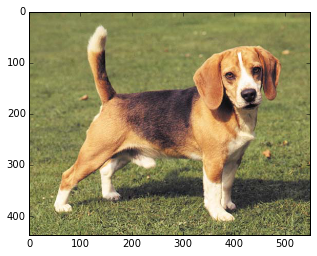

horse


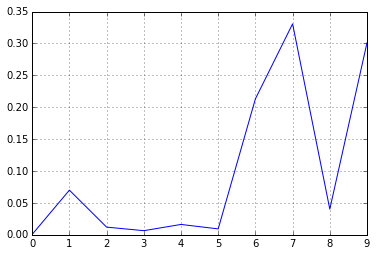

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Cargamos CAFFE en la interfaz de python
caffe_root = '/home/sandiego/Programas/caffe/'
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe


# Cargamos el modelo entrenado 
caffe.set_mode_cpu()
MODEL_FILE='/home/sandiego/septiembre/caffe/train_caffe/deploy.prototxt'
PRETRAINED='/home/sandiego/septiembre/caffe/snapshot_iter_1000.caffemodel'

net = caffe.Classifier(MODEL_FILE, PRETRAINED, 
                       raw_scale=255,
                       image_dims=(32, 32))

# Usamos una imagen de prueba
input_image = caffe.io.load_image('/home/sandiego/septiembre/caffe/imagenes/beagle.jpg')
prediction = net.predict([input_image])
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

image = mpimg.imread("/home/sandiego/septiembre/caffe/imagenes/beagle.jpg")
plt.imshow(image)
plt.show()
plt.grid()
plt.plot(prediction[0])
print labels[prediction[0].argmax()]


---

# Entrenamiento con Digits

#### Sesión interactiva

---

#Mejorar resultados de entrenamiento con Digits

<img src="imagenes/beagle.jpg">

---

##1. Primer intento

<img src="imagenes/red1.png">

<img src="imagenes/acc1.png" width=50% align=left>

<img src="imagenes/mat1.png">

---

##2. Segundo intento

<img src="imagenes/red2.png">

<img src="imagenes/acc2.png" width=50% align=left>

<img src="imagenes/mat2.png">

---

##3. Tercer Intento

<img src="imagenes/red3.png">

<img src="imagenes/acc3.png" width=50% align=left>

<img src="imagenes/mat3.png">

---

##4. Cuarto Intento

<img src="imagenes/red4.png">

<img src="imagenes/acc4.png" width=50% align=left>

<img src="imagenes/mat4.png">

---

##5. Quinto Intento

<img src="imagenes/red5.png">

<img src="imagenes/acc5.png" width=50% align=left>

<img src="imagenes/mat5.png">
